# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira visa conhecer melhor o perfil de renda de seus novos clientes para diversos fins, entre os quais, para melhor dimensionar o limite dos cartões de créditos, sem necessariamente solicitar holerites ou documentações que impactem na experiência do cliente.

Para tanto, conduziu um estudo com alguns clientes, comprovando suas rendas através de holerites e outros documentos e, com isso, pretende construir um modelo preditivo de renda até 1 salário mínimo com base em algumas variáveis que já possui em seu banco de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados

Neste estudo prévio com alguns clientes, nosso banco de dados, foram levantadas 13 variáveis, mais a variável resposta que está destacado em negrito na tabela.

O significado de cada uma dessas variáveis se encontra na tabela.
    


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | texto|
| id_cliente              |  Código de identificação do cliente                 | inteiro|
| sexo                    |  Sexo do Cliente (M = 'Masculino'; F = 'Feminino')  | texto |
| posse_de_veiculo        |  Indica se o cliente possui veículo (True = possui; False = não possui)| boleano|
| posse_de_imovel         |  Indica se o cliente possui imóvel (True = possui; False = não possui)| boleano|
| qtd_filhos              |  Quantidade de filhos do cliente                    | inteiro|
| tipo_renda              |  Tipo de Renda do Cliente (ex: assalariado, empresário, servidor público, etc.)| texto|
| educacao                |  Nível de educação (ex: primário, segundário, superior incompleto, etc.)| texto|
| estado_civil            |  Estado civil ( ex: casado, solteiro, união, separado, viúvo)| texto|
| tipo_residencia         |  Tipo de residência (ex: casa, com os pais, governamental, aluguel, etc.)| texto|
| idade                   |  Idade em anos | inteiro|
| tempo_emprego           |  Tempo de emprego em anos| float|
| qt_pessoas_residencia   |  Quantidade de pessoas na resdiência| float|
| **renda**                   |  **Renda em reais**                                     | **float**|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head(10)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


In [6]:
print(renda.shape)

(15000, 15)


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Segue abaixo a distribuição de cada variáveis:


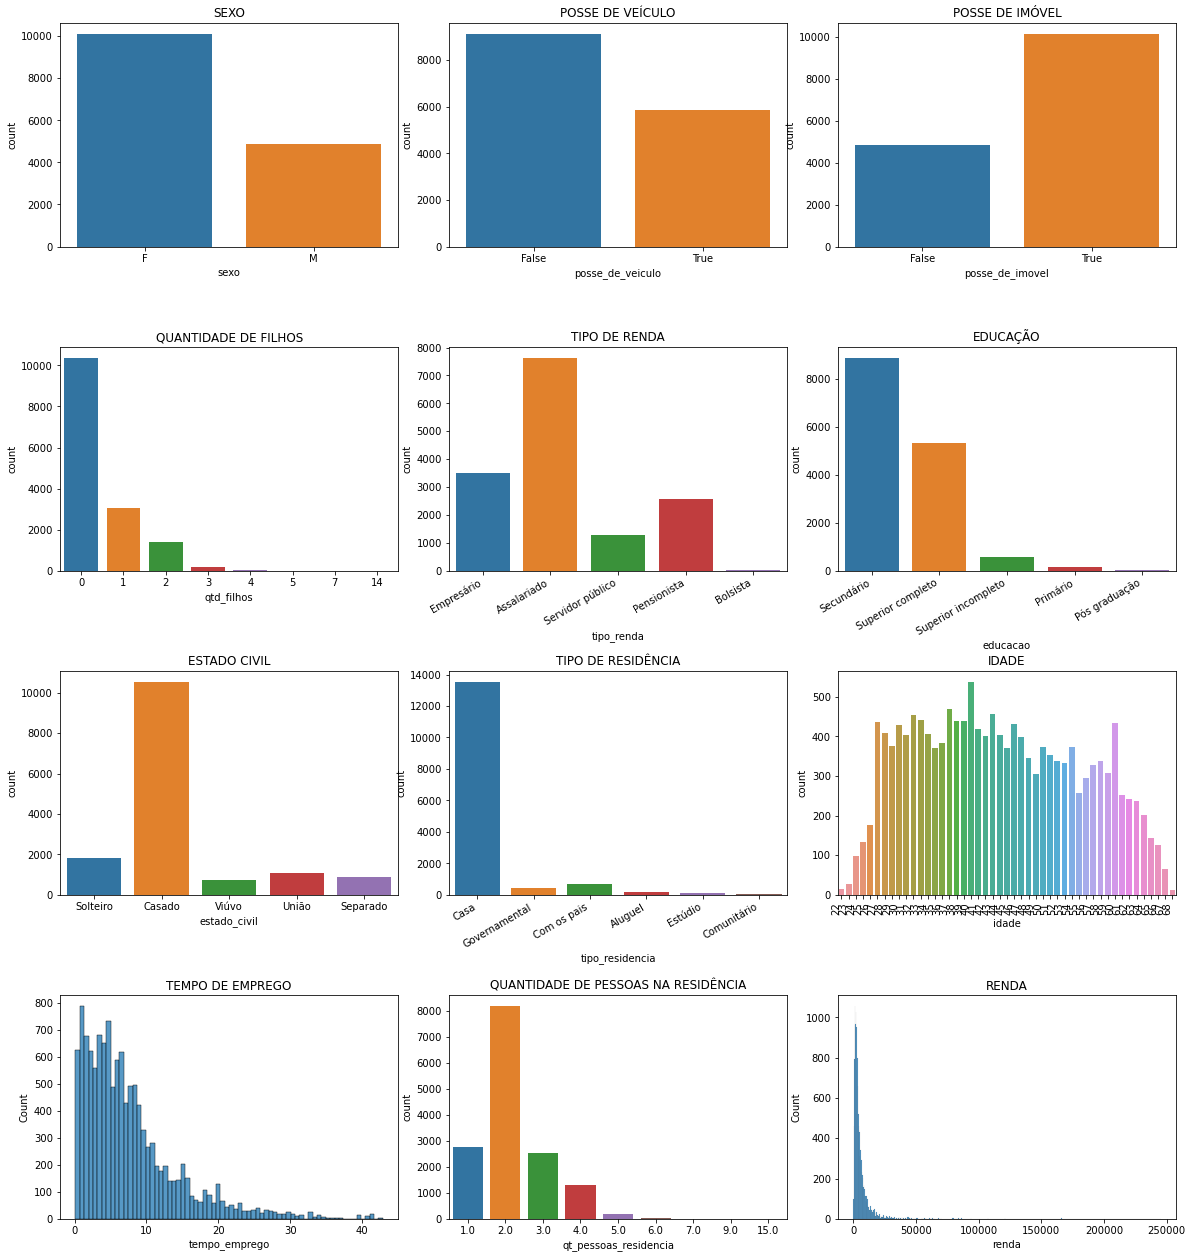

In [9]:
plt.rc('figure', figsize=(20, 22))
fig, axes = plt.subplots(4,3)


sns.countplot(ax = axes[0, 0], x='sexo', data=renda)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=renda)
sns.countplot(ax = axes[0, 2], x='posse_de_imovel', data=renda)
sns.countplot(ax = axes[1, 0], x='qtd_filhos', data=renda)
sns.countplot(ax = axes[1, 1], x='tipo_renda', data=renda)
sns.countplot(ax = axes[1, 2], x='educacao', data=renda)
sns.countplot(ax = axes[2, 0], x='estado_civil', data=renda)
sns.countplot(ax = axes[2, 1], x='tipo_residencia', data=renda)
sns.countplot(ax = axes[2, 2], x='idade', data=renda)
sns.histplot(ax = axes[3, 0], x='tempo_emprego', data=renda)
sns.countplot(ax = axes[3, 1], x='qt_pessoas_residencia', data=renda)
sns.histplot(ax = axes[3, 2], x='renda', data=renda)

plt.setp(axes[1,1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[1,2].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[2,1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[2,2].get_xticklabels(), rotation=90, ha='right')


axes[0,0].set_title('SEXO')
axes[0,1].set_title('POSSE DE VEÍCULO')
axes[0,2].set_title('POSSE DE IMÓVEL')
axes[1,0].set_title('QUANTIDADE DE FILHOS')
axes[1,1].set_title('TIPO DE RENDA')
axes[1,2].set_title('EDUCAÇÃO')
axes[2,0].set_title('ESTADO CIVIL')
axes[2,1].set_title('TIPO DE RESIDÊNCIA')
axes[2,2].set_title('IDADE')
axes[3,0].set_title('TEMPO DE EMPREGO')
axes[3,1].set_title('QUANTIDADE DE PESSOAS NA RESIDÊNCIA')
axes[3,2].set_title('RENDA')


plt.subplots_adjust(wspace=0.15, hspace=0.45)


### Entendimento dos dados - Bivariadas




Nesta etapa, avaliamos as varíaveis com relação à renda, nossa variáve resposta.

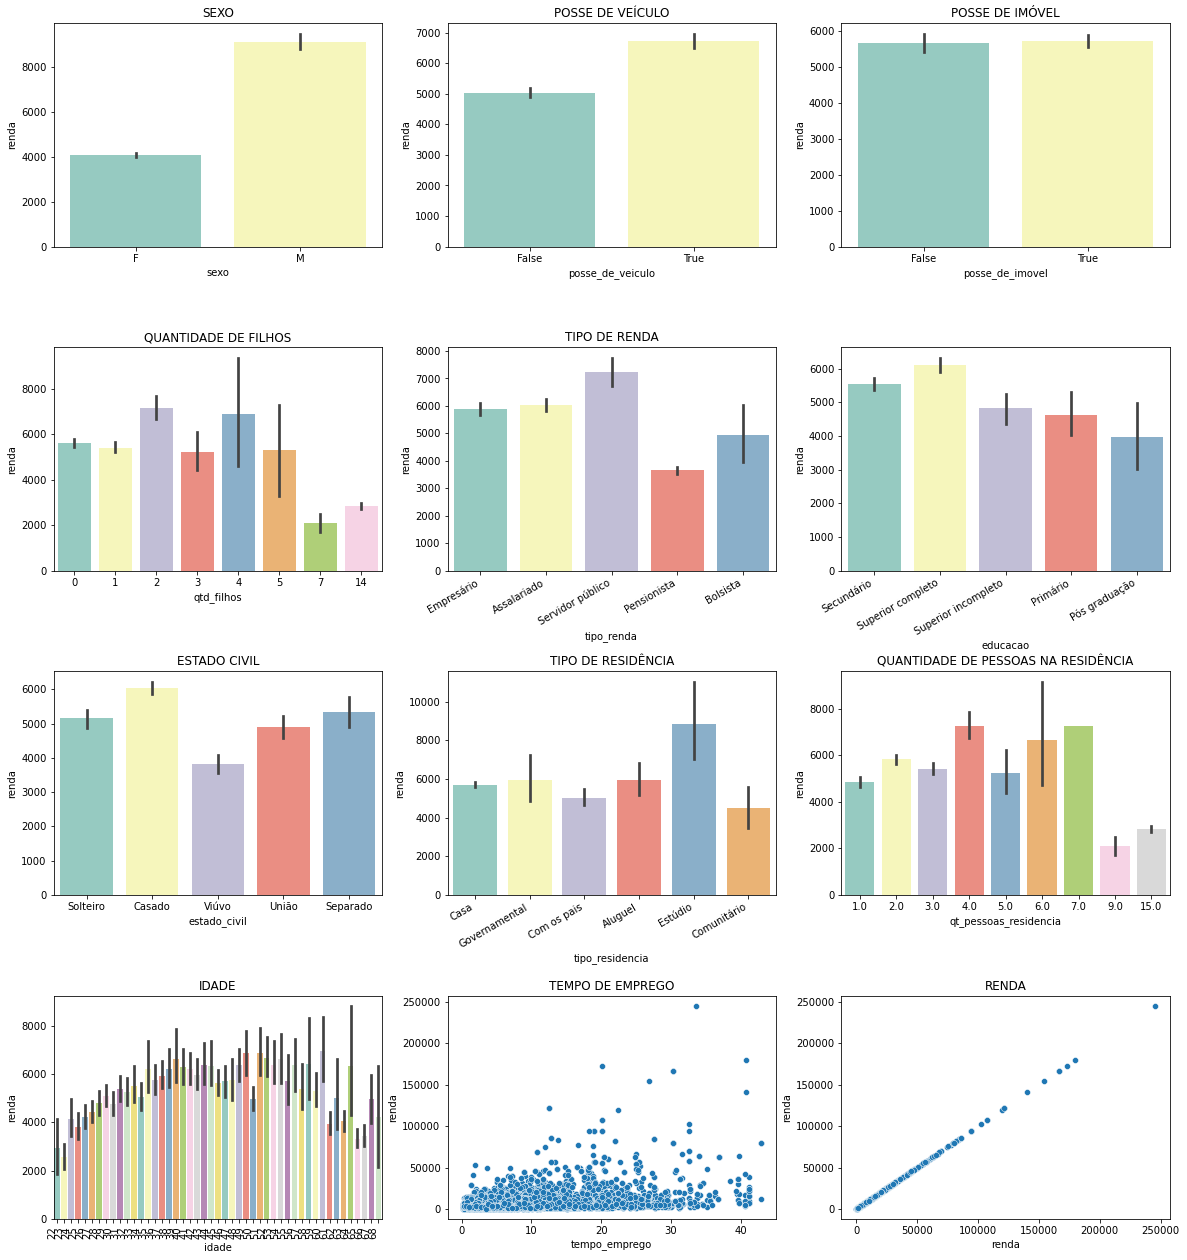

In [6]:
plt.close('all')
plt.rc('figure', figsize=(20, 22))
fig, axes = plt.subplots(4,3)

sns.barplot(ax = axes[0, 0],x = 'sexo', y='renda', data=renda, palette='Set3')
sns.barplot(ax = axes[0, 1],x = 'posse_de_veiculo', y='renda', data=renda, palette='Set3')
sns.barplot(ax = axes[0, 2], x='posse_de_imovel', y = 'renda', data=renda, palette='Set3')
sns.barplot(ax = axes[1, 0], x='qtd_filhos', y= 'renda', data=renda, palette='Set3')
sns.barplot(ax = axes[1, 1], x='tipo_renda', y = 'renda', data=renda, palette='Set3')
sns.barplot(ax = axes[1, 2], x='educacao', y = 'renda', data=renda, palette='Set3')
sns.barplot(ax = axes[2, 0], x='estado_civil', y='renda', data=renda, palette='Set3')
sns.barplot(ax = axes[2, 1], x='tipo_residencia', y='renda', data=renda, palette='Set3')
sns.barplot(ax = axes[2, 2], x='qt_pessoas_residencia',y='renda', data=renda, palette='Set3')
sns.barplot(ax = axes[3, 0], x='idade', y='renda', data=renda, palette='Set3')
sns.scatterplot(ax = axes[3, 1], x='tempo_emprego', y='renda', data=renda)
sns.scatterplot(ax = axes[3, 2], x='renda', y='renda', data=renda)

plt.setp(axes[1,1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[1,2].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[2,1].get_xticklabels(), rotation=30, ha='right')
plt.setp(axes[3,0].get_xticklabels(), rotation=90, ha='right')

axes[0,0].set_title('SEXO')
axes[0,1].set_title('POSSE DE VEÍCULO')
axes[0,2].set_title('POSSE DE IMÓVEL') 
axes[1,0].set_title('QUANTIDADE DE FILHOS')
axes[1,0].set_title('QUANTIDADE DE FILHOS')
axes[1,1].set_title('TIPO DE RENDA')
axes[2,0].set_title('ESTADO CIVIL')
axes[2,1].set_title('TIPO DE RESIDÊNCIA')
axes[2,2].set_title('QUANTIDADE DE PESSOAS NA RESIDÊNCIA')
axes[3,0].set_title('IDADE')
axes[3,1].set_title('TEMPO DE EMPREGO')
axes[3,2].set_title('RENDA')

plt.subplots_adjust(wspace=0.20, hspace=0.45)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [8]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [12]:
def renda_2salariominimo(df): 
    if df['renda'] <= 2424:
        df['renda_2salariominimo'] = 1 
    else:
        df['renda_2salariominimo'] = 0 
    return df

In [13]:
dados_renda=(renda.dropna().drop(['Unnamed: 0','data_ref', 'id_cliente'], axis=1))
dados_renda = pd.get_dummies(dados_renda)
dados_renda['posse_de_veiculo'] = pd.get_dummies(dados_renda['posse_de_veiculo'], drop_first=True)
dados_renda['posse_de_imovel'] = pd.get_dummies(dados_renda['posse_de_imovel'], drop_first=True)
dados_renda = dados_renda.rename(columns= {'tipo_renda_Servidor público':'tipo_renda_Servidor_público',
                       'educacao_Pós graduação':'educacao_Pós_graduação',
                       'educacao_Superior completo': 'educacao_Superior_completo',
                       'educacao_Superior incompleto':'educacao_Superior_incompleto',
                       'tipo_residencia_Com os pais':'tipo_residencia_Com_os_pais'})

dados_renda = dados_renda.apply(renda_2salariominimo, axis=1)


In [14]:
dados_renda['renda_2salariominimo'].value_counts()

0.0    8662
1.0    3765
Name: renda_2salariominimo, dtype: int64

In [15]:
dados_renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_F                         12427 non-null  float64
 8   sexo_M                         12427 non-null  float64
 9   tipo_renda_Assalariado         12427 non-null  float64
 10  tipo_renda_Bolsista            12427 non-null  float64
 11  tipo_renda_Empresário          12427 non-null  float64
 12  tipo_renda_Pensionista         12427 non-null 

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### **Dividindo a base em teste e treino, na proporção de 25% e 75%, respectivamente.**


In [16]:
X = (dados_renda.drop(columns=['renda', 'renda_2salariominimo']))
y = (dados_renda['renda_2salariominimo'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=1000)

In [17]:
X_train

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
2593,1.0,1.0,1.0,44.0,6.934247,2.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9817,0.0,1.0,0.0,51.0,33.367123,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3365,0.0,1.0,0.0,53.0,3.879452,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8934,1.0,1.0,1.0,38.0,4.931507,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2098,0.0,1.0,0.0,44.0,7.430137,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.0,0.0,2.0,28.0,2.364384,4.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4569,0.0,0.0,1.0,40.0,7.186301,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7498,0.0,1.0,0.0,46.0,3.386301,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5668,0.0,1.0,0.0,35.0,1.871233,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Rodando o modelo


A função RandomForestClassifier gera a estrutura da floresta aleatória e o parâmetro n_estimator define o número de árvores na floresta. Normalmente a acurária do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite, e aumenta também o recurso computacional demandado.

In [18]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10)

In [27]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))


Acurácia: 74.38%


'74.38043128419697'

In [ ]:
format

In [20]:
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.19644444444444445
0.5869311551925321


renda_2salariominimo,0.0,1.0
row_0,,
0.0,1808,442
1.0,354,503


In [21]:
y_test.shape

(3107,)

## Etapa 5 Crisp-DM: Avaliação dos resultados


Pelo metodo acima empregado obteve-se a acurácia de 75,19%, ou seja, da amostragem de teste (y_test) correspondente a 3.107 casos de clientes a terem suas rendas preditas (considerando a renda até 2 salários mínimos), houve o acerto de 2.336 casos (sendo 1.827 casos de clientes com renda superior a 2 salários mínimos e 509 casos de cientes com renda igual ou inferior a 2 salários mínimos). Enfim, o modelo apresentou eficácia em 75,19% dos casos, de modo a possibilitar a fixação de um limite de crédito sem a necessidade de solicitação de maiores documentações.

Quanto ao desvio apresentado no modelo, que corresponde a 24,81% (total de 771 casos), cabe verificar que 335 casos corresponde à predição de renda inferior a 2 salários mínimos enquanto que na realidade recebiam mais de 2 salários mínimos, o que não representa prejuízo ao banco por eventual inadimplência visto que se trata de concessão de crédito menor ao permitido, caso fosse solicitado todas das documentações de renda. Assim sendo, somente 14,03% (436/3107)representaria situação de risco ao banco, por representar concessão de crédito acima do que a renda permitiria.   

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.